In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts
from tensorflow import keras

In [125]:
data = pd.read_csv("creditcard.csv")

In [126]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [130]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [131]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [132]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [114]:
data["V1"].dtype

dtype('float64')

In [134]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]


In [136]:
non_fraud.shape

(284315, 31)

In [138]:
 fraud.shape

(492, 31)

In [139]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [140]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,39634.0,-0.417938,-0.148491,2.004189,-0.405297,-0.885177,0.147702,0.761700,-0.307139,1.029893,...,0.163457,0.735901,-0.105711,-0.128781,-0.562958,0.222802,-0.299503,-0.433001,179.00,0
980,4493.0,-0.706607,0.724203,2.593014,1.831703,-0.113562,0.843926,-0.122834,0.319628,1.808750,...,-0.506621,-0.629282,-0.043324,0.039430,-0.047964,-0.410763,0.416105,0.182637,9.99,0
981,99306.0,1.962469,-0.359930,-0.222852,0.208403,-0.401012,0.193129,-0.854063,0.069441,2.414626,...,0.088359,0.739115,0.176539,0.706715,-0.195607,0.034366,-0.010263,-0.050848,3.58,0
982,144930.0,2.053815,0.064810,-2.088586,0.096486,0.444545,-1.809786,0.923666,-0.677960,0.084696,...,0.181970,0.620393,-0.085551,0.128356,0.447939,0.230957,-0.088740,-0.070007,44.30,0


In [142]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [143]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [150]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [151]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)


2.1.0


In [157]:
X_train.shape

(787, 30)

In [159]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [161]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [163]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [165]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [166]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [168]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/20
787/787 [==============================] - 0s 460us/sample - loss: 0.1802 - accuracy: 0.9352 - val_loss: 0.2066 - val_accuracy: 0.9188
Epoch 2/20
787/787 [==============================] - 0s 444us/sample - loss: 0.1745 - accuracy: 0.9288 - val_loss: 0.2075 - val_accuracy: 0.9188
Epoch 3/20
787/787 [==============================] - 0s 438us/sample - loss: 0.1741 - accuracy: 0.9377 - val_loss: 0.2065 - val_accuracy: 0.9188
Epoch 4/20
787/787 [==============================] - 0s 462us/sample - loss: 0.1994 - accuracy: 0.9327 - val_loss: 0.2051 - val_accuracy: 0.9188
Epoch 5/20
787/787 [==============================] - 0s 611us/sample - loss: 0.1736 - accuracy: 0.9365 - val_loss: 0.2038 - val_accuracy: 0.9289
Epoch 6/20
787/787 [==============================] - 0s 474us/sample - loss: 0.1635 - accuracy: 0.9390 - val_loss: 0.2049 - val_accuracy: 0.9289
Epoch 7/20
787/787 [==============================] - 0s 460us/sample - loss: 

In [169]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

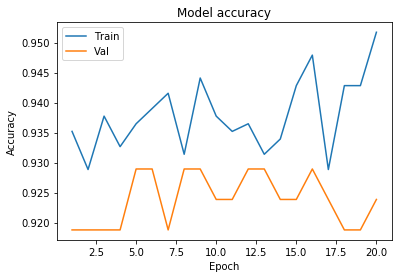

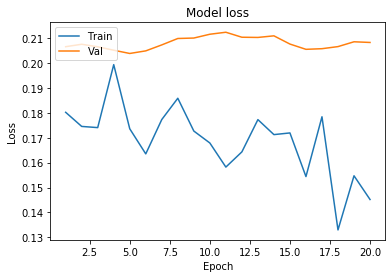

In [171]:
plot_learningCurve(history, epochs)

Train on 787 samples, validate on 197 samples
Epoch 1/50
787/787 [==============================] - 3s 4ms/sample - loss: 1.0678 - accuracy: 0.5959 - val_loss: 0.6766 - val_accuracy: 0.6244
Epoch 2/50
787/787 [==============================] - 0s 438us/sample - loss: 0.9503 - accuracy: 0.6518 - val_loss: 0.6504 - val_accuracy: 0.6447
Epoch 3/50
787/787 [==============================] - 0s 396us/sample - loss: 0.6924 - accuracy: 0.7039 - val_loss: 0.6364 - val_accuracy: 0.6193
Epoch 4/50
787/787 [==============================] - 0s 413us/sample - loss: 0.6471 - accuracy: 0.7370 - val_loss: 0.6255 - val_accuracy: 0.6244
Epoch 5/50
787/787 [==============================] - 0s 422us/sample - loss: 0.6061 - accuracy: 0.7522 - val_loss: 0.6128 - val_accuracy: 0.6244
Epoch 6/50
787/787 [==============================] - 0s 338us/sample - loss: 0.6111 - accuracy: 0.7789 - val_loss: 0.5976 - val_accuracy: 0.6447
Epoch 7/50
787/787 [==============================] - 0s 322us/sample - loss: 0.

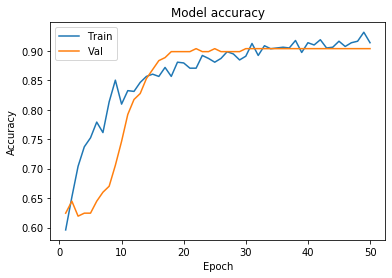

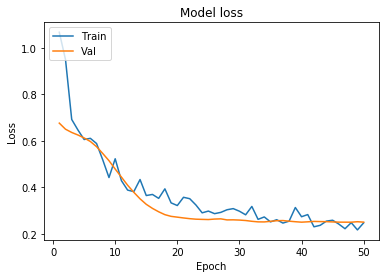

In [172]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)